<a href="https://colab.research.google.com/github/Nathan499/CS-167/blob/main/Notebook6_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name: Nathan Larsen
Date: 4/23/23

## Problem Description: This is where I am going to talk about the Convoluational neural network is going to learn to recognize pneumonia from chest x-ray images.



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [4]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS 167/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS 167/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Epoch 1/10
163/163 [==============================] - 61s 371ms/step - loss: 0.4191 - accuracy: 0.8104 - val_loss: 0.3682 - val_accuracy: 0.8189
Epoch 2/10
163/163 [==============================] - 16s 97ms/step - loss: 0.2064 - accuracy: 0.9139 - val_loss: 0.3472 - val_accuracy: 0.8429
Epoch 3/10
163/163 [==============================] - 16s 98ms/step - loss: 0.1869 - accuracy: 0.9247 - val_loss: 0.6676 - val_accuracy: 0.7580
Epoch 4/10
163/163 [==============================] - 17s 106ms/step - loss: 0.1456 - accuracy: 0.9417 - val_loss: 0.7459 - val_accuracy: 0.7612
Epoch 5/10
163/163 [==============================] - 16s 97ms/step - loss: 0.1428 - accuracy: 0.9463 - val_loss: 0.4564 - val_accuracy: 0.8093
Epoch 6/10
163/163 [==============================] - 16s 99ms/step - loss: 0.1356 - accuracy: 0.9456 - val_loss: 1.0567 - val_accuracy: 0.7115
Epoch 7/10
163/163 [==============================] - 16s 98ms/step - loss: 0.1315 - accuracy: 0.9480 - val_loss: 0.7368 - val_accurac

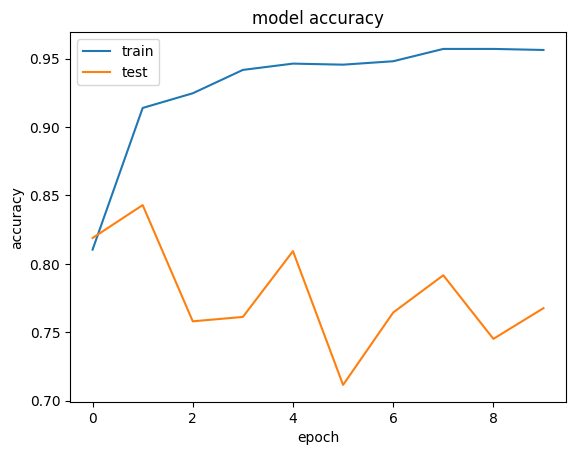

In [8]:
from keras.optimizers.optimizer import learning_rate_schedule
# Build your CNN here
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(32,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results2 = model2.fit(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#This started to overfit after epoch 1 when test was trending down and training was improving

In [ ]:
#This is going to be the tune CNN
